In [1]:
import numpy as np
import pandas as pd
import pyodbc
import sqlalchemy
import sqlite3
from subprocess import check_output
import os
from IPython.core.display import Image, display

from sqlalchemy import create_engine
engine = create_engine('sqlite:////...', echo=False)

## 1. Date/time types and formats.
### Main `types`
$\diamond$ `Date` and `date-time` `format` at some `specificed times`

| Type | Format | Examples |
|:-|:-|:-|
| `date` | `yyyy-mm-dd` | `2020-10-06` |
| `Timestamp` | `yyyy-mm-dd hh:mm:ss` | `2020-10-06 01:29:16` |

$\diamond$ `Interval`. Represent a `range` of `time`; e.g., 

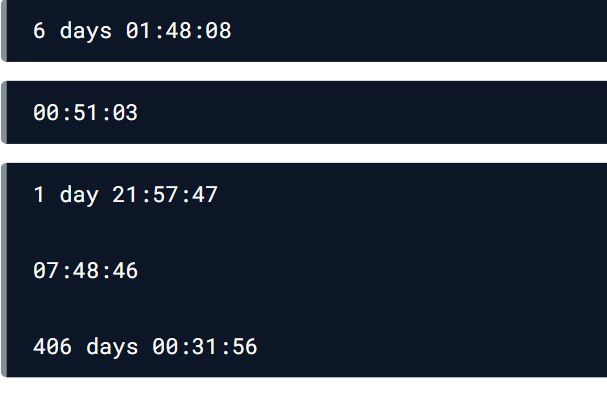

In [2]:
### 

$\qquad \bullet$ **Notes.** We can represent a `date/time` format in differents representations. 

$\qquad \quad$ For instance, the `timestamp:` `1pm` on `January 10, 2018` can be written in many `types` as follow.

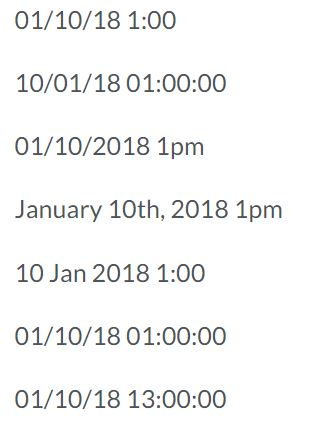

In [3]:
### 

### Main `format`
$\diamond$ **`ISO 8601`.** `ISO` = International Organization for Standards.

$\qquad \bullet$ `Format-defintion:` `YYYY-MM-DD HH:MM:SS`

$\qquad \bullet$ Example: `2020-10-06 05:23:27`

$\diamond$ **`UTC` and `timezones`.** where `UTC` meant `Coordinated Universal Time`.

$\qquad \bullet$ `Format-defintion:` `Timestamp from ISO 8601` **+** `timezone`

$\qquad \bullet$ Example: `2020-10-06 05:23:27+07`

### Another issues.
$\diamond$ `Date/time` **comparision**; such as `>`, `<`, `=`

$\qquad \bullet$ Example: `SELECT '2020-01-01' > '2019-12-31`

$\diamond$ **`current-time`** with `NOW`

$\qquad \bullet$ Example: `SELECT NOW() > '2019-12-31`

$\diamond$ **`Date` subtraction.**

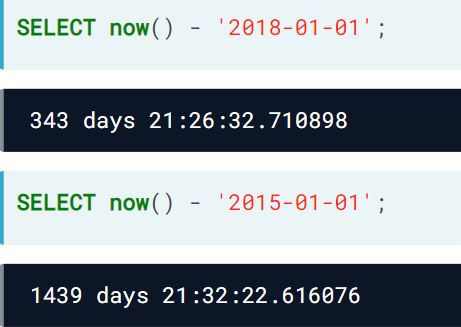

In [4]:
### 

$\diamond$ **`Date` addition.**

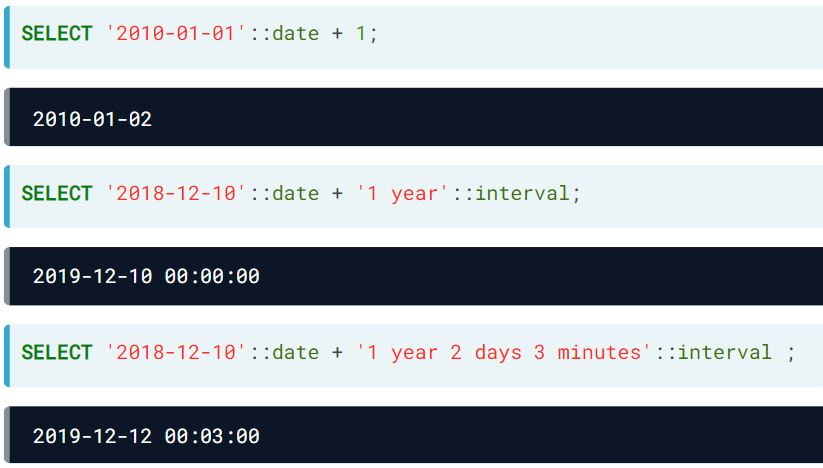

In [5]:
### 

### EXERCISE.
#### Exercise 1.1. ISO 8601
$\qquad$ Which `date format` below conforms to the `ISO 8601` standard?

- `A`. `June 15, 2018 3:30pm`
- `B`. `2018-06-15 15:30:00`
- `C`. `6/15/18 13:00`
- `D`. `2018-6-15 3:30:00`

**Answers & comments.**

- Remind that the **correct `ISO 8601 format`** is `yyyy-mm-dd hh:mm:ss` (4 digits for `year`; 2 for `month`, 2 for `days`, 2 for `hours`, 2 for `minutes` and `seconds`). This meant the `ISO 8601 format` specifies dates and times with numbers only.

- So **`B` is the correct answer.**

- The option `D` missing zero in the `month` and `hour` which contains only one digit; so `D` is wrong!

- The last 2 options `A` and `C` are totally wrong! `A` contain the `string: June` while the fields are not in the correct order in `C`.

#### Exercise 1.2. `Date comparisons`
$\qquad$ When working with `timestamps`, sometimes you want to find all observations on a given day. However, if you specify only a `date` in a comparison, you may get unexpected results. This `query`:

                        SELECT count(*) 
                        FROM evanston311
                        WHERE date_created = '2018-01-02';
returns `0`, even though there were 49 requests on `January 2, 2018`.

This is because dates are automatically converted to `timestamps` when compared to a `timestamp`. The time fields are all set to zero:

                        SELECT '2018-01-02'::timestamp;
                                2018-01-02 00:00:00
When working with both `timestamps` and `dates`, you'll need to keep this in mind.

#### Instructions.
**Step 1.** Count the number of `Evanston 311` requests created on `January 31, 2017` by casting `date_created` to a `date`.

**SOLUTION.**

                        SELECT count(*) 
                        FROM evanston311
                        WHERE date_created::date = '2017-01-31';
- **`query result`.**

| count |
|:-:|
| 45 |

**Step 2.** Count the number of `Evanston 311` requests created on `February 29, 2016` by using `>=` and `<` operators.

**SOLUTION.**

                    SELECT count(*)
                    FROM evanston311 
                    WHERE date_created >= '2016-02-29 00:00:00' 
                      AND date_created < '2016-02-29 23:59:59';
- **`query result`.**

| count |
|:-:|
| 58 |

**Step 3.** 
- Count the number of requests created on `March 13, 2017`.
- Specify the `upper bound` by `adding 1` to the `lower bound`.

**SOLUTION.**

                    SELECT COUNT(*)
                    FROM evanston311
                    WHERE date_created >= '2017-03-13 00:00:00'
                      AND date_created < '2017-03-13 00:00:00'::date + 1

- **`query result`.**

| count |
|:-:|
| 33 |

- **Comments.** The strategy used in the first step is the simpliest and will often work, but the other approaches may be useful in different circumstances.

#### Exercise 1.3.  `Date arithmetic`.
$\qquad$ You can subtract `dates` or `timestamps` from each other.

You can add time to `dates` or `timestamps` using `intervals`. An `interval` is specified with a number of units and the name of a `datetime` field. For example:
- `'3 days'::interval`
- `'6 months'::interval`
- `'1 month 2 years'::interval`
- `'1 hour 30 minutes'::interval`

Practice `date arithmetic` with the `Evanston 311` data and `now()`.

#### Instructions.
**Step 1.** Subtract the `minimum` `date_created` from the `maximum` `date_created`.

**SOLUTION.**

                        SELECT max(date_created) - min(date_created) AS during_times
                        FROM evanston311;

- **`query result`.**

| during_times |
|:-|
| 911 days, 16:33:39 |

**Step 2.** Using `now()`, find out how old the most recent `evanston311` request was created.

**SOLUTION.**

                        SELECT (NOW() - max(date_created)) AS age
                        FROM evanston311;

- **`query result`.**

| age |
|:-|
| 826 days, 11:58:19.916410 |

**Step 3.** Add `100 days` to the `current` `timestamp`.

**SOLUTION.**

                        SELECT NOW() + '100 days'::interval AS from_now_100days;
- **`query result`.**

| from_now_100days |
|:-|
| 2021-01-12 04:38:01.078198+00:00 |

**Step 4.** Select the `current timestamp` and the current timestamp `plus` `5 minutes`.

**SOLUTION.**

                        SELECT NOW() + '5 minutes'::interval AS from_now_5mins;
- **`query result`.**

|from_now_5mins|
|:-|
2020-10-04 04:44:31.476524+00:00

- **Comments.** The `'s'` at the of `'minutes'` is **optional**. The `query` will work `with` or `without` it.

#### Exercise 1.4. Completion time by category
$\qquad$ The `evanston311` data includes a `date_created` `timestamp` from when each request was created and a `date_completed` `timestamp` for when it was completed. The difference between these tells us how long a request was open.

Which `category` of `Evanston 311` requests takes the longest to complete?

#### Instructions
- Compute the `average difference` between the completion `timestamp` and the creation `timestamp` by `category`.
- Order the results with the `largest average` time to complete the request first.
- Limit the first 10 values.

**SOLUTION.**

                        SELECT category,
                               AVG(date_completed - date_created) AS completion_time
                        FROM evanston311
                        GROUP BY category
                        ORDER BY completion_time DESC
                        LIMIT 10
- **`query result`.**

category|completion_time
:-|:-
Rodents- Rats|64 days, 10:58:23.000766
Fire Prevention - Public Education|34 days, 16:48:10
Key Request - All  City Employees|32 days, 0:52:11
Smoking|27 days, 7:42:30.238095
Notice of Violation|24 days, 5:41:12.666667
Exterior Conditions|23 days, 22:18:31.087719
General/Routine Maintenance - Facilities Management|23 days, 3:01:56.480000
Trash - Special Pickup (STAFF ONLY)|19 days, 6:04:52.096070
Public Transit Agency Issue|19 days, 3:28:15.845070
Private Utility Service Issue|17 days, 19:50:13.130000

- **Comments.** The results of one `query` can help you generate further questions to answer: Why do **`rat`** issues take `so long to resolve`? We'll investigate in an upcoming exercise.

## 2. Date/time components and aggregation.
### Common `date/time fields`
$\qquad \diamond$ **`Century`.** E.g., `2020-01-14` = `century 21` 

$\qquad \diamond$ **`Decade`.** E.g., `2020-01-14` = `century 202` 

$\qquad \diamond$ **`year, month, day`** E.g., `2020 (year)`, `01 (month)` and `14 (day)`

$\qquad \diamond$ **`week` (in a year).** E.g., `53` is the final week of a year.

$\qquad \diamond$ **`dow` (day of week).** E.g., `2020-10-04` is `Sunday` hence `day_of_week = 0`

$\qquad \diamond$ **`hours, minutes, seconds`.**

### Extracting `fields` from `date/time`

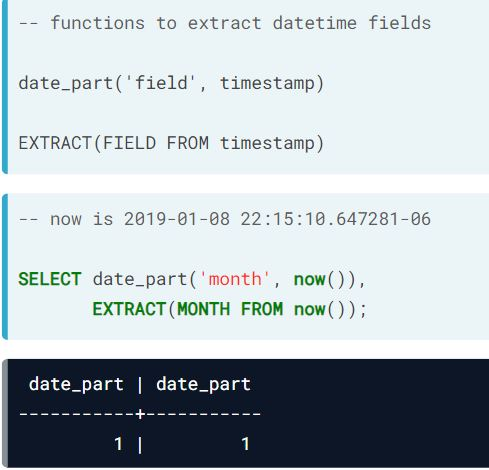

In [6]:
### 

$\qquad$ **EXTRACT TO SUMMARIZED BY FIELD.**

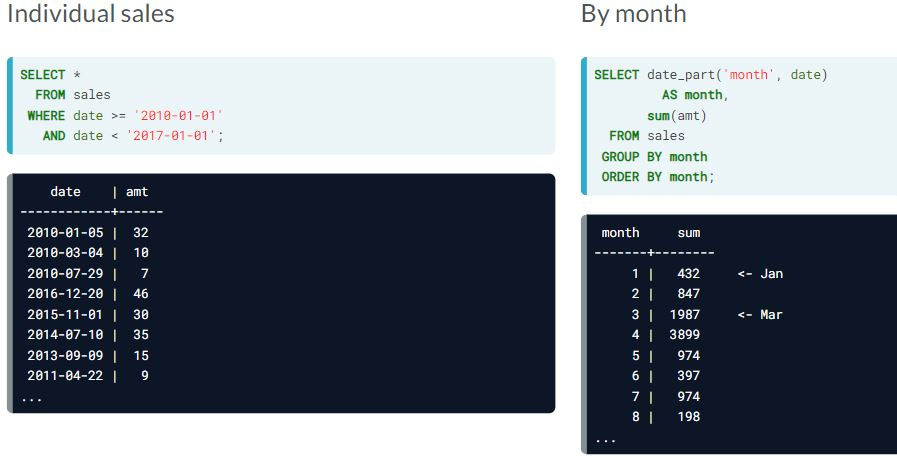

In [7]:
### 

### Truncating `date`.
$\qquad \diamond$ **`Syntax`**

                                    date_trunc('field', timestamp)

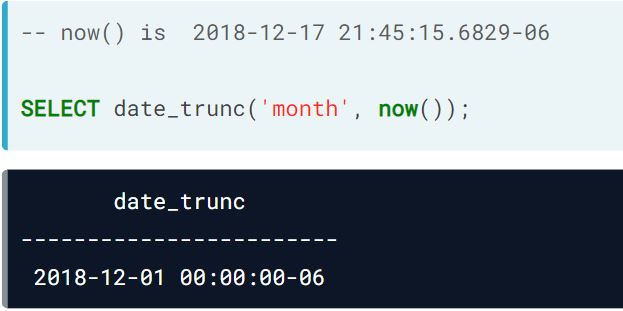

In [8]:
### 

$\qquad$ **TRUNCATE TO CUT THE `LARGE UNITs`.**

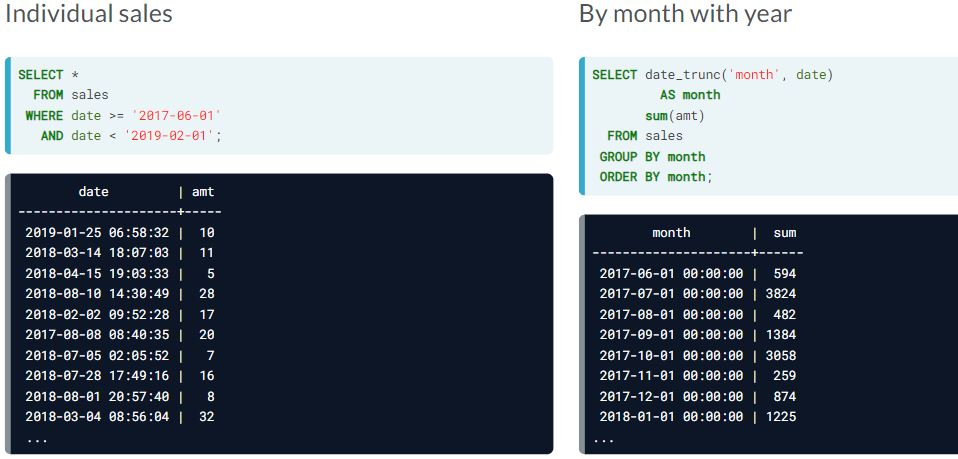

In [9]:
### 

### EXERCISEs.
#### Exercise 2.1. Date parts
$\qquad$ The `date_part()` function is useful when you want to `aggregate` data by a unit of time across `multiple larger units` of `time`. For example, 
- aggregating data `by month` across `different years`, or 
- aggregating `by hour` across `different days`.

Recall that you use `date_part()` as:

                        SELECT date_part('field', timestamp);
In this exercise, you'll use `date_part()` to gain insights about when `Evanston 311` requests are submitted and completed.

#### Instructions 
**Step 1.** How many requests are created in each of the 12 `months` during `2016-2017`?

**SOLUTION.**

                    SELECT date_part('month', date_created) AS month, 
                           COUNT(*)
                    FROM evanston311
                    WHERE date_part('year', date_created) IN (2016, 2017)
                    GROUP BY month;

- **`query result`.**

month|count
:-|:-
1|1811
2|1774
3|2171
4|2385
5|2674
6|3404
7|3063
8|3109
9|2760
10|2398
11|2283
12|2000


**Step 2.** What is the `most common hour` of the `day` for requests to be created?

**SOLUTION.**

                    SELECT date_part('hour', date_created) AS hour,
                           COUNT(*)
                    FROM evanston311
                    GROUP BY hour
                    ORDER BY count(*) DESC
                    LIMIT 1;
- **`query result`.**

| hour | count |
|:-|:-|
| 9 | 4089 |

**Step 3.**
- During what `hours` are requests usually completed? Count requests completed `by hour`.
- Order the results by `hour`.

**SOLUTION.**

                        SELECT date_part('hour', date_completed) AS hour,
                               COUNT(*)
                        FROM evanston311
                        GROUP BY hour
                        ORDER BY hour
- **`query result`.**

|hour|count
:-|:-
0|13
1|10
2|11
3|19
4|9
5|50
6|1296
7|1870
8|2516
9|2744
10|3162
11|3351
12|3580
13|4787
14|5059
15|5242
16|1605
17|428
18|204
19|131
20|101
21|124
22|69
23|50

- **Comments.** You can also `aggregate` by `day` or `week` of the `year`, **but make sure you read the documentation about how they are computed before using these units**.

#### Exercise 2.2. Variation `by day of week`
$\qquad$ Does the time required to complete a request vary by the `day of the week` on which the request was created?

$\qquad$ We can get the name of the day of the week by converting a `timestamp` to character data:

                    to_char(date_created, 'day') 
But character names for the days of the week `sort in alphabetical`, `not chronological`, order. To get the chronological order of `days of the week` with an integer value for each day, we can use:

                    EXTRACT(DOW FROM date_created)
Remind that `DOW` stands for `"day of week."`

#### Instructions
- Select the `name` of the `day of the week` the request was created (`date_created`) as `day`.
- Select the `mean time` between the request completion (`date_completed`) and request creation as `duration`.
- Group by `day` (the name of the `day of the week`) and the integer value for the day of the `week` (use a function).
- Order by the integer value of the `day of the week` using the same function used in `GROUP BY`.

**SOLUTION.**

                    SELECT to_char(date_created, 'day') AS day, 
                           AVG(date_completed - date_created) AS duration
                    FROM evanston311 
                    GROUP BY day, EXTRACT(DOW FROM date_created)
                    ORDER BY EXTRACT(DOW FROM date_created);
- **`query result`.**

day|duration
:-|:-
sunday   |9 days, 1:47:22.572982
monday   |7 days, 0:56:40.041519
tuesday  |7 days, 2:56:21.726767
wednesday|7 days, 12:07:08.185632
thursday |7 days, 10:23:30.633975
friday   |8 days, 10:44:09.025246
saturday |7 days, 14:37:00.356259

- **Comments.** Requests created at the beginning of the work week are closed sooner on average than those created at `the end of the week` or on the `weekend`.

#### Exercise 2.3. `Date truncation`
$\qquad$ Unlike `date_part()` or `EXTRACT()`, `date_trunc()` keeps `date/time` units larger than the field you specify as part of the date. So instead of just extracting one component of a `timestamp`, `date_trunc()` returns the specified unit and all larger ones as well.

Recall the `syntax`:

                        date_trunc('field', timestamp)
Using `date_trunc()`, find the average number of Evanston 311 requests created per day for each month of the data. Ignore days with no requests when taking the average.

#### Instructions
- Write a `subquery` to count the number of requests created `per day`.
- Select the `month` and `average count` `per month` from the `daily_count` `subquery`.

**SOLUTION.**

                    SELECT date_trunc('month', day) AS month,
                           AVG(count) AS avg_count
                    FROM (SELECT date_trunc('day', date_created) AS day,
                                 COUNT(*) AS count
                              FROM evanston311
                              GROUP BY day) AS daily_count
                     GROUP BY month
                     ORDER BY month;

- **`query result`.**

month|avg_count
:-|:-
2016-01-01 00:00:00+00:00|23.5161290322580645
2016-02-01 00:00:00+00:00|30.7241379310344828
2016-03-01 00:00:00+00:00|35.5483870967741935
2016-04-01 00:00:00+00:00|37.3000000000000000
2016-05-01 00:00:00+00:00|40.7666666666666667
2016-06-01 00:00:00+00:00|44.0000000000000000
2016-07-01 00:00:00+00:00|41.4838709677419355
2016-08-01 00:00:00+00:00|46.5483870967741935
2016-09-01 00:00:00+00:00|47.3333333333333333
2016-10-01 00:00:00+00:00|35.8064516129032258
2016-11-01 00:00:00+00:00|36.6206896551724138
2016-12-01 00:00:00+00:00|29.3870967741935484
2017-01-01 00:00:00+00:00|34.9032258064516129
2017-02-01 00:00:00+00:00|32.7037037037037037
2017-03-01 00:00:00+00:00|35.6333333333333333
2017-04-01 00:00:00+00:00|42.2000000000000000
2017-05-01 00:00:00+00:00|46.8064516129032258
2017-06-01 00:00:00+00:00|69.4666666666666667
2017-07-01 00:00:00+00:00|57.3225806451612903
2017-08-01 00:00:00+00:00|53.7419354838709677
2017-09-01 00:00:00+00:00|44.6666666666666667
2017-10-01 00:00:00+00:00|41.5483870967741935
2017-11-01 00:00:00+00:00|40.7000000000000000
2017-12-01 00:00:00+00:00|36.3000000000000000
2018-01-01 00:00:00+00:00|35.4827586206896552
2018-02-01 00:00:00+00:00|30.5714285714285714
2018-03-01 00:00:00+00:00|29.6774193548387097
2018-04-01 00:00:00+00:00|35.1333333333333333
2018-05-01 00:00:00+00:00|45.3548387096774194
2018-06-01 00:00:00+00:00|44.4666666666666667

- **Comments.** This `query` ignores `dates` with no requests. You'll learn how to account for `missing dates` in an upcoming exercise.

## 3. Aggregating with `date/time series`.
### Generate a `series`
$\qquad \diamond$ **`Syntax`**

                            generate_series(from, to, interval)
$\qquad \diamond$ **Example.** From `Jan 01, 2018` to `Jan 15, 2018` with the `time-step: 2 days`

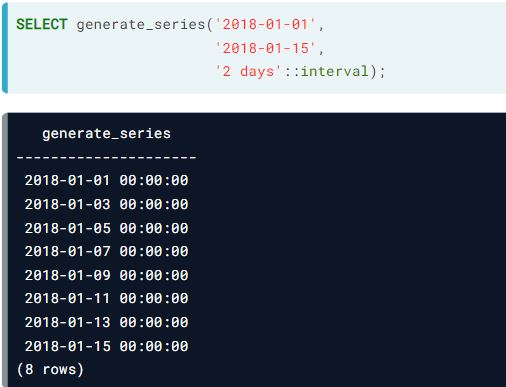

In [10]:
### 

$\qquad \diamond$ **Example.** With the `time-step: 5 hours`

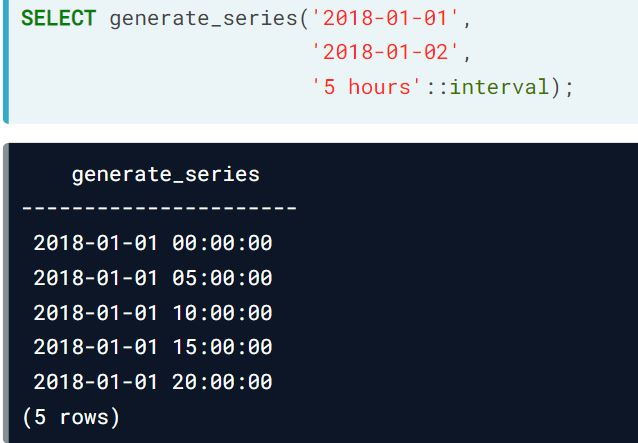

In [11]:
### 

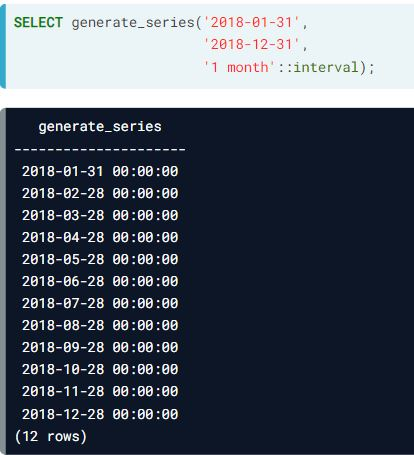

In [12]:
### 

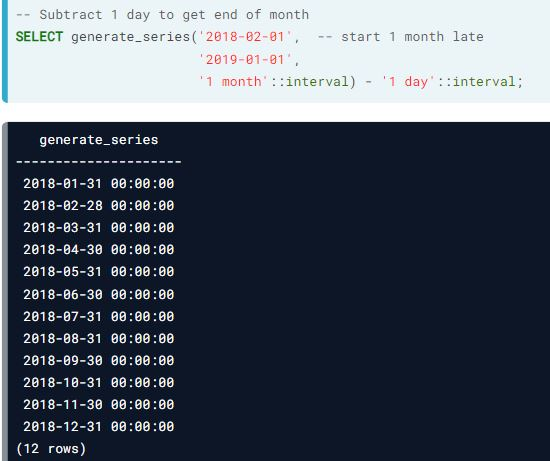

In [13]:
### 

### Normal aggregation.

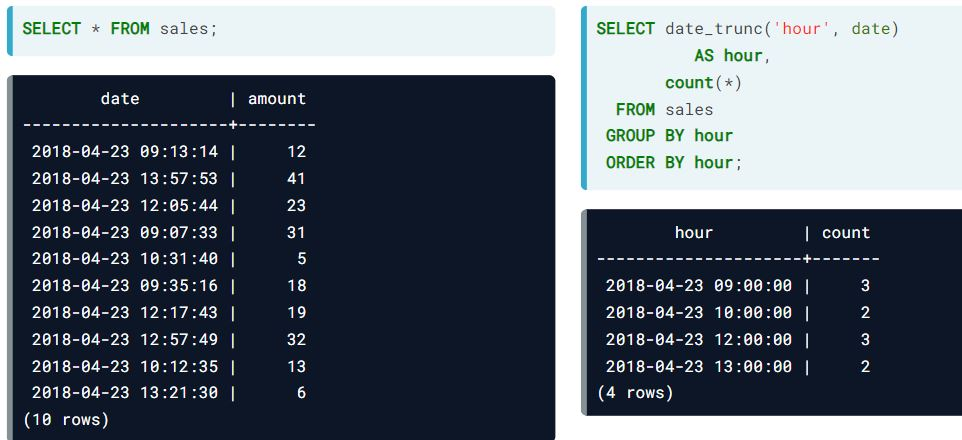

In [14]:
### 

$\qquad \diamond$ **`Aggregation`** with `series`

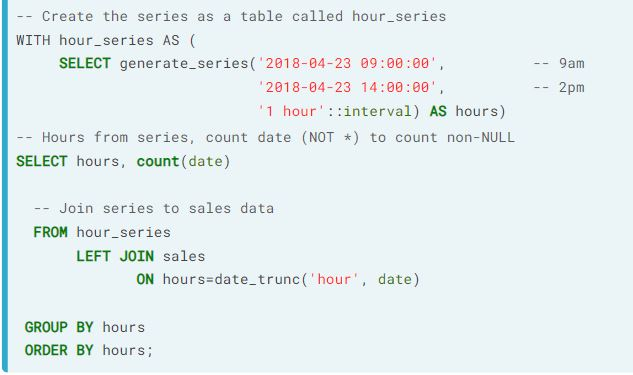

In [15]:
### 

 **`result`.**

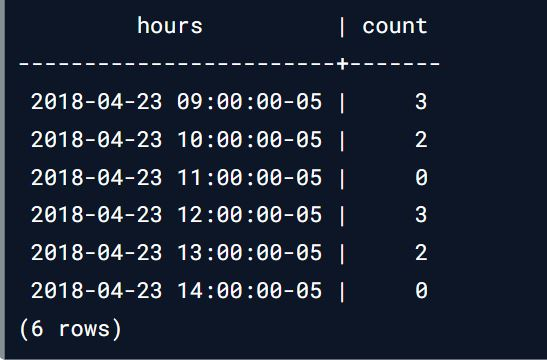

In [16]:
### 

$\qquad \diamond$ **`Aggregation`** with `bins (bin-width)`

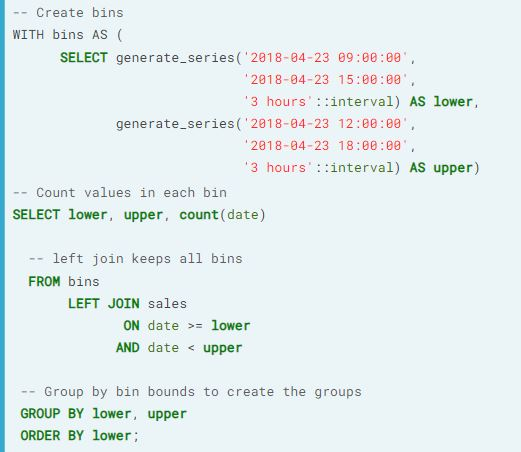

In [17]:
### 

**`result`.**

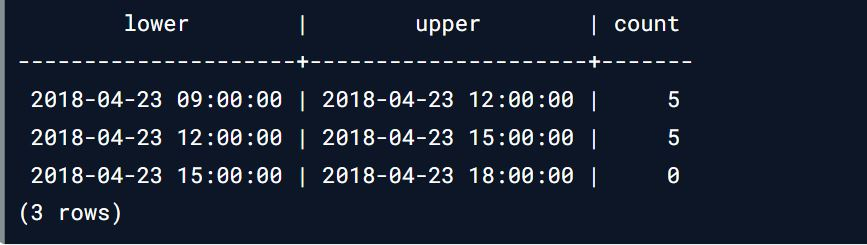

In [18]:
### 

### EXERCISEs.
#### Exercise 3.1. Find `missing dates`
The `generate_series()` function can be useful for identifying `missing dates`.

Recall:

                    generate_series(from, to, interval)
where from and to are `dates` or `timestamps`, and `interval` can be specified as a string with a number and a unit of time, such as `'1 month'`.

Are there any `days` in the `Evanston 311` data where **no requests were created?**

#### Instructions
- Write a `subquery` using `generate_series()` to get all dates between the `min()` and `max()` `date_created` in `evanston311`.
- Write another `subquery` to select all values of `date_created` as dates from `evanston311`.
- Both `subqueries` should produce values of `type date` (look for the `::`).
- Select `dates (day)` from the `first subquery` that are `NOT IN` the `results` of the `second subquery`. This gives you days that are not in `date_created`.

**SOLUTION.**

                    SELECT day
                    FROM(
                          SELECT generate_series(
                                                 MIN(date_created),  -- from
                                                 MAX(date_created),  -- to
                                                 '1 day'::interval -- interval
                                                )::date AS day
                          FROM evanston311) AS all_dates   -- What table is date_created in?
                          WHERE day NOT IN (      -- Select dates (day from above) that are NOT IN the subquery
                                            SELECT date_created::date
                                            FROM evanston311);
- **`query result`.**

|day
|--
2016-05-08
2016-11-06
2017-02-05
2017-03-12
2017-12-25
2018-01-06
2018-01-14

- **Comments.** This approach works for finding missing values of other `units of time`, such as `hours` or `months`, as well.

#### Exercise 3.2. Custom aggregation periods
$\qquad$ Find the `median` number of `Evanston 311` requests per day in each `six month` period from `2016-01-01` to `2018-06-30`. Build the `query` following the three steps below.

$\qquad$ Recall that to `aggregate` data by `non-standard` `date/time` `intervals`, such as `six months`, you can use `generate_series()` to create bins with lower and upper bounds of time, and then summarize observations that fall in each bin.

#### Instructions
**Step 1.**
- Use `generate_series()` to create bins of `6 month intervals`. Recall that the `upper bin` values **are exclusive**, so the values need to be one day greater than the last day to be included in the `bin`.
- Notice that the `first bin` value of the `upper bound` is `July 1st`, and `not June 30th`.
- Use the same approach when creating the `last bin` values of the `lower` and `upper bounds` (i.e. for 2018).

**SOLUTION.**

                SELECT generate_series('2016-01-01',  -- First bin lower value
                                       '2018-01-01',  -- Last bin lower value
                                       '6 months'::interval) AS lower,
                       generate_series('2016-07-01',  -- First bin upper value
                                       '2018-07-01',  -- Last bin upper value
                                       '6 months'::interval) AS upper;
- **`query result`.**

lower|upper
:-|:-
2016-01-01 00:00:00+00:00|2016-07-01 00:00:00+00:00
2016-07-01 00:00:00+00:00|2017-01-01 00:00:00+00:00
2017-01-01 00:00:00+00:00|2017-07-01 00:00:00+00:00
2017-07-01 00:00:00+00:00|2018-01-01 00:00:00+00:00
2018-01-01 00:00:00+00:00|2018-07-01 00:00:00+00:00

**Step 2.** 
- `Count` the number of requests created `per day`. Remember to `not count *`, or you will risk counting `NULL values`.
- Include days with `no requests` by `joining evanston311` to a `daily series` from `2016-01-01` to `2018-06-30`.
- Note that because we are not generating bins, you can use `June 30th` as your `series end date`.

**SOLUTION.**

- **`query result`.**


**SOLUTION.**

                     SELECT day, count(date_created) AS count
                     FROM( SELECT generate_series('2016-01-01',  -- series start date
                                                  '2018-06-30',  -- series end date
                                                  '1 day'::interval)::date AS day
                            ) AS daily_series
                         LEFT JOIN evanston311
                            ON day = date_created::date
                     GROUP BY day;
- **`query result`.**

day|count
:-|-:
2016-01-01|5
2016-01-02|27
2016-01-03|8
2016-01-04|55
2016-01-05|33
2016-01-06|44
2016-01-07|35
2016-01-08|29
2016-01-09|17
2016-01-10|1
...|...
2018-06-21|55
2018-06-22|52
2018-06-23|11
2018-06-24|3
2018-06-25|81
2018-06-26|52
2018-06-27|42
2018-06-28|69
2018-06-29|51
2018-06-30|7

**Step 3.** 
- Assign each `daily count` to a single `6 month bin` by joining bins to `daily_counts`.
- Compute the `median` value per bin using `percentile_disc()`

**SOLUTION.**

        WITH bins AS ( -- Bins from Step 1
             SELECT generate_series('2016-01-01', '2018-01-01',
                                    '6 months'::interval) AS lower,
                    generate_series('2016-07-01', '2018-07-01',
                                    '6 months'::interval) AS upper),
                    daily_counts AS ( -- Daily counts from Step 2
                                     SELECT day, count(date_created) AS count
                                     FROM (SELECT generate_series('2016-01-01', '2018-06-30',
                                                                  '1 day'::interval)::date AS day
                                            ) AS daily_series
                                     LEFT JOIN evanston311
                                        ON day = date_created::date
                                     GROUP BY day
                                     )
        SELECT lower, upper, -- Select bin bounds 
               percentile_disc(0.5) WITHIN GROUP (ORDER BY daily_counts) AS median -- Compute median of count for each bin
        FROM bins   
             LEFT JOIN daily_counts  -- Join bins and daily_counts
                ON day >= lower     -- Where the day is between the bin bounds
                  AND day <= upper
        GROUP BY lower, upper
        ORDER BY lower;

- **`query result`.**

lower|upper|median
:-|:-|:-
2016-01-01 00:00:00+00:00|2016-07-01 00:00:00+00:00|(2016-04-01,49)
2016-07-01 00:00:00+00:00|2017-01-01 00:00:00+00:00|(2016-10-01,22)
2017-01-01 00:00:00+00:00|2017-07-01 00:00:00+00:00|(2017-04-01,22)
2017-07-01 00:00:00+00:00|2018-01-01 00:00:00+00:00|(2017-10-01,5)
2018-01-01 00:00:00+00:00|2018-07-01 00:00:00+00:00|(2018-04-01,2)

- **Comments.** You might need to create custom bins to correspond to `fiscal years`, `academic years`, `2-week periods`, or other reporting periods for your organization.

#### Exercise 3.3. Monthly average with missing dates
Find the average number of `Evanston 311` requests created per day for each month of the data.

This time, **do not ignore `dates` with `no requests`**.

#### Instructions
- Generate a `series` of dates from `2016-01-01` to `2018-06-30`.
- Join the series to a `subquery` to count the number of requests created `per day`.
- Use `date_trunc()` to get `months` from `date`, which has all dates, `NOT` `day`.
- Use `coalesce()` to replace `NULL` count values with 0. Compute the `average` of this value.

**SOLUTION.**

            WITH all_days AS( SELECT generate_series('2016-01-01', '2018-06-30',
                                                     '1 day'::interval
                                                      ) AS date
                             ),
                 daily_count AS( -- Subquery to compute daily counts
                                SELECT date_trunc('day', date_created) AS day,
                                       count(*) AS count
                                FROM evanston311
                                GROUP BY day
                                )
            SELECT date_trunc('month', date) AS month,
                   avg(coalesce(count, 0)) AS average -- Use coalesce to replace NULL count values with 0
            FROM all_days
                LEFT JOIN daily_count
                   ON all_days.date = daily_count.day
             GROUP BY month
             ORDER BY month; 

- **`query result`.**

month|average
:-|:-
2016-01-01 00:00:00+00:00|23.5161290322580645
2016-02-01 00:00:00+00:00|30.7241379310344828
2016-03-01 00:00:00+00:00|35.5483870967741935
2016-04-01 00:00:00+00:00|37.3000000000000000
2016-05-01 00:00:00+00:00|39.4516129032258065
2016-06-01 00:00:00+00:00|44.0000000000000000
2016-07-01 00:00:00+00:00|41.4838709677419355
2016-08-01 00:00:00+00:00|46.5483870967741935
2016-09-01 00:00:00+00:00|47.3333333333333333
2016-10-01 00:00:00+00:00|35.8064516129032258
2016-11-01 00:00:00+00:00|35.4000000000000000
2016-12-01 00:00:00+00:00|29.3870967741935484
2017-01-01 00:00:00+00:00|34.9032258064516129
2017-02-01 00:00:00+00:00|31.5357142857142857
2017-03-01 00:00:00+00:00|34.4838709677419355
2017-04-01 00:00:00+00:00|42.2000000000000000
2017-05-01 00:00:00+00:00|46.8064516129032258
2017-06-01 00:00:00+00:00|69.4666666666666667
2017-07-01 00:00:00+00:00|57.3225806451612903
2017-08-01 00:00:00+00:00|53.7419354838709677
2017-09-01 00:00:00+00:00|44.6666666666666667
2017-10-01 00:00:00+00:00|41.5483870967741935
2017-11-01 00:00:00+00:00|40.7000000000000000
2017-12-01 00:00:00+00:00|35.1290322580645161
2018-01-01 00:00:00+00:00|33.1935483870967742
2018-02-01 00:00:00+00:00|30.5714285714285714
2018-03-01 00:00:00+00:00|29.6774193548387097
2018-04-01 00:00:00+00:00|35.1333333333333333
2018-05-01 00:00:00+00:00|45.3548387096774194
2018-06-01 00:00:00+00:00|44.4666666666666667

- **Comments.** Because there are few days with no requests, including them doesn't change the averages much. But, including them is always the right way to compute accurate averages!

## 4. Time between events
### Problems!
How can measure the `time` between 2 `consecutive events`

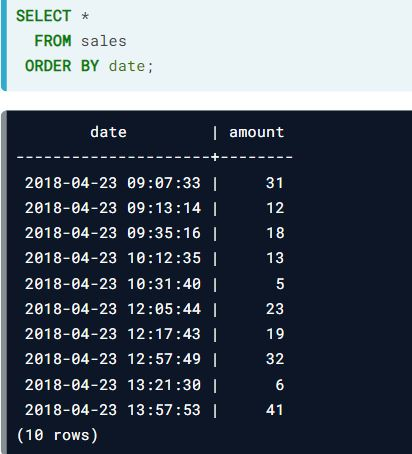

In [19]:
### 

$\qquad \diamond$ **`LEAD` and `LAG` functions.**

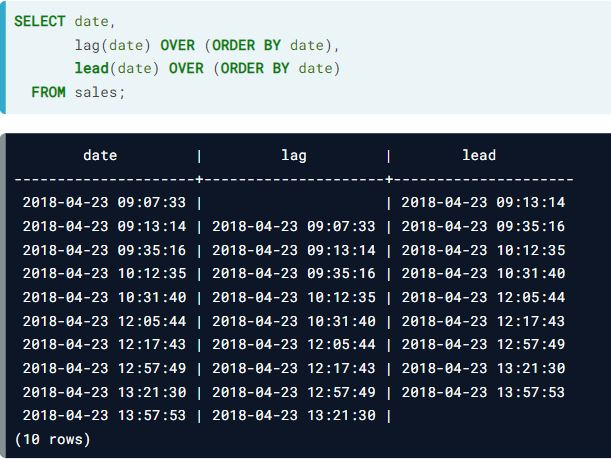

In [20]:
### 

$\qquad \diamond$ **Calculate `TIME` between events**

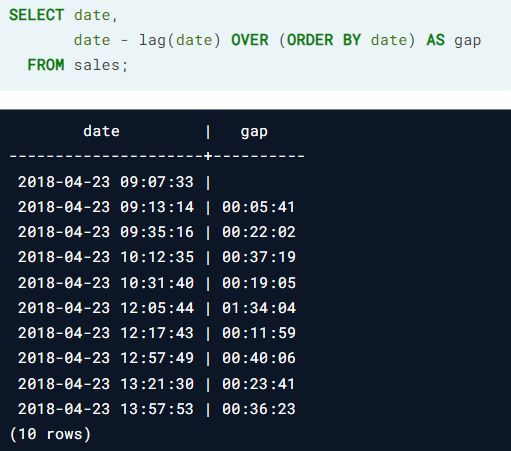

In [21]:
### 

$\qquad \diamond$ **Average `TIME` between events**

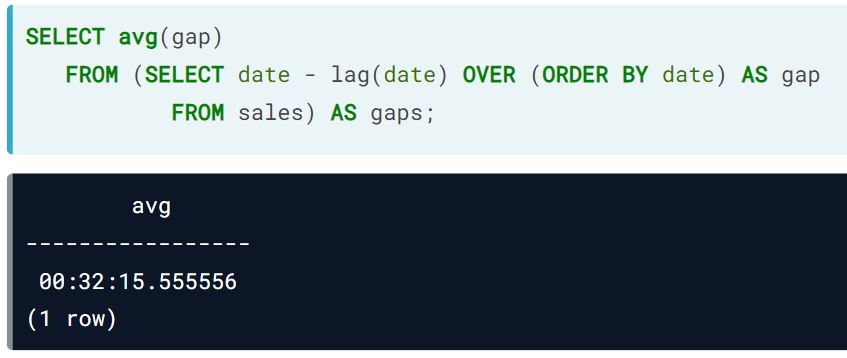

In [22]:
### 

$\qquad \diamond$ **`Change` in the `time series`**

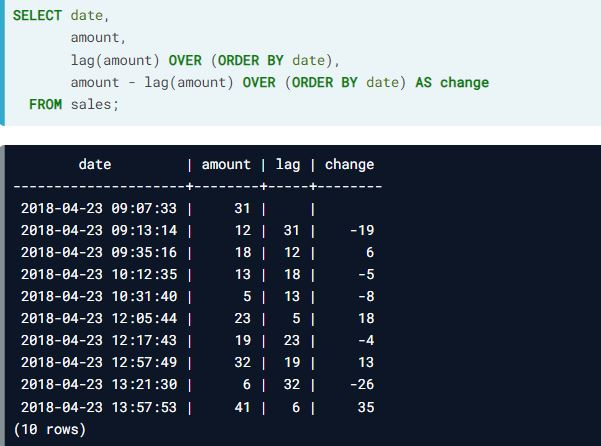

In [23]:
### 

### EXERCISE.
#### Exercise 4.1. Longest gap
$\qquad$ What is the `longest time` between `Evanston 311` `requests` being `submitted`?

Recall the `syntax` for `lead()` and `lag()`:

                lag(column_to_adjust) OVER (ORDER BY ordering_column)
                lead(column_to_adjust) OVER (ORDER BY ordering_column)
#### Instructions
- Select `date_created` and the `date_created` of the `previous request` using `lead()` or `lag()` as appropriate.
- Compute the `gap` between each request and the previous request.
- Select the row with the `maximum gap`.

**SOLUTION.**

                WITH request_gaps AS ( -- Compute the gaps
                        SELECT date_created,
                               lag(date_created) OVER (ORDER BY date_created) AS previous, -- lead or lag
                               date_created - lag(date_created) OVER (ORDER BY date_created) AS gap
                          FROM evanston311)

                SELECT *                   -- Select the row with the maximum gap
                FROM request_gaps
                WHERE gap = (              -- Subquery to select maximum gap from request_gaps
                                SELECT MAX(gap)
                                FROM request_gaps); 

- **`query result`.**

date_created|previous|gap
:-|:-|:-
2018-01-07 18:41:34+00:00|2018-01-05 18:04:09+00:00|2 days, 0:37:25

- **Comments.** This `query` uses a `WITH clause` because we need to refer to `request_gap` `twice` to select the row with the maximum value.

#### Exercise 4.2. Rats!
$\qquad$ Requests in category `"Rodents- Rats"` average over 64 days to resolve. Why?

**`Investigate in 4 steps:`**
- 1) Why is the average so high? Check the distribution of completion times. Hint: `date_trunc()` can be used on intervals.
- 2) See how excluding outliers influences average `completion times`.
- 3) Do requests made in busy months take longer to complete? Check the correlation between the average completion time and requests `per month`.
- 4) Compare the number of requests created per month to the number completed.

**`Remember`**: the time to resolve, or completion time, is `date_completed` - `date_created`.

#### Instructions
**Step 1.** Use `date_trunc()` to examine the distribution of rat request completion times by number of days.

**SOLUTION.**

                SELECT date_trunc('day', date_completed - date_created) AS completion_time,
                       COUNT(*)
                FROM evanston311
                WHERE category = 'Rodents- Rats'
                GROUP BY completion_time
                ORDER BY count(*);

- **`query result`.**

completion_time|count
:-|:-
0:00:00|73
13 days, 0:00:00|42
12 days, 0:00:00|23
2 days, 0:00:00|23
44 days, 0:00:00|19
1 day, 0:00:00|17
45 days, 0:00:00|17
87 days, 0:00:00|17
...|...
161 days, 0:00:00|1
177 days, 0:00:00|1
190 days, 0:00:00|1
238 days, 0:00:00|1
280 days, 0:00:00|1
283 days, 0:00:00|1
286 days, 0:00:00|1
348 days, 0:00:00|1

`(209 rows)`

**Step 2.** Compute average completion time per category excluding the longest `5%` of `requests` (outliers).

**SOLUTION.**

            SELECT category, 
                   AVG(date_completed - date_created) AS avg_completion_time -- Compute average.completion.time
              FROM evanston311
              WHERE (date_completed - date_created) < ( -- Compute the 95th.percentile of completion.time in a subquery
                                                       SELECT percentile_disc(0.95) 
                                                              WITHIN GROUP(
                                                                       ORDER BY (date_completed - date_created)
                                                                           )
                                                       FROM evanston311
                                                       )
            GROUP BY category
            ORDER BY avg_completion_time DESC;

- **`query result`.**

category|avg_completion_time
:-|:-
Trash Cart - Downsize, Upsize or Remove|12 days, 17:47:50.586912
Sanitation Billing Questions|12 days, 11:13:25.888889
THIS REQUEST IS INACTIVE...Trash Cart - Compost Bin|12 days, 6:32:42.024390
Trash, Recycling, Yard Waste Cart- Repair/Replacement|11 days, 18:48:27.488108
Rodents- Rats|11 days, 8:58:00.840849
Landmark Building Plaque or Nomination|11 days, 5:11:11.666667
...|...
Dropped Keys/item in Drainage Structure|8:57:48
Child Seat Installation or Inspection|8:37:10.424124
Animal Service - Wilmette|8:10:43.500000
Lawn Irrigation Violation|7:02:40.666667
Food Waste, Collective Resource- Ask a Question/Send a Message|3:33:31
General Payment Question - Water Bill|2:04:36

`(148 rows)`

**Step 3.** Get `corr()` between `avg`. `completion time` and `monthly requests`. `EXTRACT(epoch FROM interval)` returns seconds in interval.

**SOLUTION.**

                SELECT corr(avg_completion, count) 
                FROM(                                   -- compute the corr from the sub-query
                      SELECT date_trunc('month', date_created) AS month, -- Convert date_created to its month
                             AVG(                       -- Compute average completion.time in number of seconds 
                                EXTRACT(epoch FROM date_completed - date_created)
                                ) AS avg_completion,    -- alias avg_completion
                             count(*) AS count          -- Count requests per month
                      FROM evanston311
                      WHERE category = 'Rodents- Rats'  -- Focus only on 'Rodents- Rats'
                      GROUP BY month
                     ) AS monthly_avgs;                 -- Required alias for subquery
- **`query result`.**

| corr |
|:-:|
|0.234379930623995|


**Step 4.** Select the number of requests created and number of requests completed `per month`.

**SOLUTION.**

                WITH created AS ( -- Compute monthly counts of requests created
                        SELECT date_trunc('month', date_created) AS month,
                              count(*) AS created_count
                        FROM evanston311
                        WHERE category='Rodents- Rats'
                        GROUP BY month),
                     completed AS ( -- Compute monthly counts of requests completed
                        SELECT date_trunc('month', date_completed) AS month,
                              count(*) AS completed_count
                        FROM evanston311
                        WHERE category = 'Rodents- Rats'
                        GROUP BY month)

                -- Join monthly created and completed counts
                SELECT created.month, created_count, 
                       completed_count
                  FROM created
                       INNER JOIN completed
                       ON created.month = completed.month
                 ORDER BY created.month;

- **`query result`.**

month|created_count|completed_count
:-|:-|:-:
2016-01-01 00:00:00+00:00|11|1
2016-02-01 00:00:00+00:00|21|11
2016-03-01 00:00:00+00:00|31|14
2016-04-01 00:00:00+00:00|36|16
2016-05-01 00:00:00+00:00|40|19
2016-06-01 00:00:00+00:00|41|49
2016-07-01 00:00:00+00:00|80|47
2016-08-01 00:00:00+00:00|79|43
2016-09-01 00:00:00+00:00|56|58
2016-10-01 00:00:00+00:00|76|67
2016-11-01 00:00:00+00:00|63|61
2016-12-01 00:00:00+00:00|20|83
2017-01-01 00:00:00+00:00|16|34
2017-02-01 00:00:00+00:00|20|30
2017-03-01 00:00:00+00:00|24|32
2017-04-01 00:00:00+00:00|43|14
2017-05-01 00:00:00+00:00|50|17
2017-06-01 00:00:00+00:00|65|34
2017-07-01 00:00:00+00:00|68|46
2017-08-01 00:00:00+00:00|87|53
2017-09-01 00:00:00+00:00|54|70
2017-10-01 00:00:00+00:00|78|12
2017-11-01 00:00:00+00:00|44|174
2017-12-01 00:00:00+00:00|12|65
2018-01-01 00:00:00+00:00|19|45
2018-02-01 00:00:00+00:00|10|10
2018-03-01 00:00:00+00:00|28|27
2018-04-01 00:00:00+00:00|35|23
2018-05-01 00:00:00+00:00|46|47
2018-06-01 00:00:00+00:00|52|55

- **Comments.** There is a slight correlation between completion times and the number of requests per month. But the bigger issue is the disproportionately large number of requests completed in November 2017.